<a href="https://colab.research.google.com/github/GGCIRILLO/Web-Terrarium/blob/main/Session_03/ames_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Business - Explaining House Prices

## Initialize notebook
Load required packages. Set up workspace, e.g., set theme for plotting and initialize the random number generator.

In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
np.random.seed(42)
plt.style.use('fivethirtyeight')

## Case description

### Real Estate Appraisal

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. With 76 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset challenges you to explain the final price of each home. More: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>


## Load data

Load data from CSV file.

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/olivermueller/ds4b-2024/refs/heads/main/Session_03/ameshousing.csv')

Perform a random train/test split.

In [5]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ThreeSsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
381,20,RL,80,10400,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,6,2009,WD,Family,152000
834,60,RL,0,28698,Pave,none,IR2,Low,AllPub,CulDSac,...,0,225,0,none,0,6,2009,WD,Abnorml,185000
1898,90,RL,70,9842,Pave,none,Reg,Lvl,AllPub,FR2,...,0,0,0,none,0,3,2007,WD,Normal,101800
678,90,RL,60,7200,Pave,none,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,6,2009,WD,Normal,90000
700,190,RM,63,7627,Pave,none,Reg,Lvl,AllPub,Corner,...,0,0,0,none,0,10,2009,WD,Normal,94550


In [7]:
data_train.shape

(2344, 77)

In [8]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

## Prepare data

Let us first focus on some easy to understand variables.

In [9]:
data_train = data_train[["SalePrice", "Neighborhood", "HouseStyle", "LotArea", "GrLivArea", "FullBath", "BedroomAbvGr", "KitchenAbvGr", "OverallQual", "OverallCond"]]

In [10]:
data_train.head()

,SalePrice,Neighborhood,HouseStyle,LotArea,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,OverallQual,OverallCond
381,152000,NWAmes,1Story,10400,1370,2,3,1,7,5
834,185000,ClearCr,2Story,28698,2126,2,3,1,5,5
1898,101800,NAmes,1Story,9842,1224,2,2,2,4,5
678,90000,NAmes,1Story,7200,1040,2,2,2,4,5
700,94550,OldTown,2Story,7627,1701,2,4,2,4,6


## Exploratory data analysis

### Descriptive summary statistics

We can quickly calculate the most important summary statistics for a variable with *describe()*.

In [11]:
data_train["SalePrice"].describe()

,SalePrice
count,2344.000000
mean,178582.207765
std,77125.072713
min,12789.000000
25%,129000.000000
50%,160000.000000
75%,210000.000000
max,755000.000000


### Visualize distribution of single variables
In the following, we will use histograms and density plots to get a feeling of the distribution of our main variables. See https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot for more information.

Let's first look at the dependent variable (*SalePrice*).

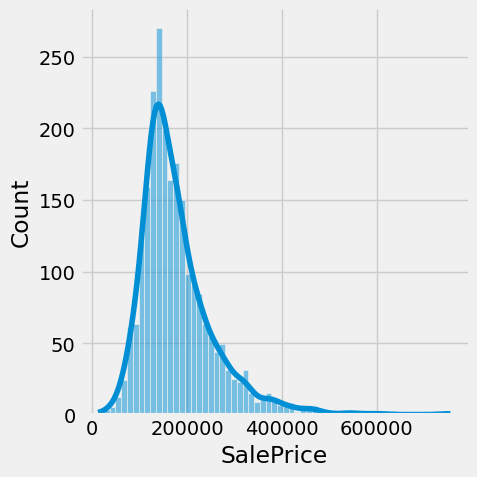

In [38]:
sns.displot(data_train, x="SalePrice", kde=True)
plt.show()

Let's look at some numerical independent variables. We will start with *GrLivArea*.

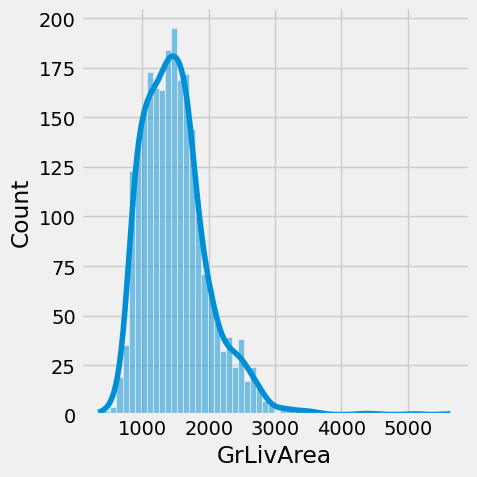

In [13]:
sns.displot(data_train, x="GrLivArea", kde=True)
plt.show()

Next, let's look at the variable *OverallQual*.

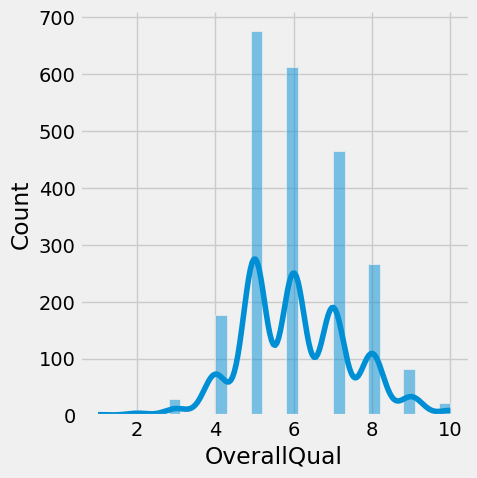

In [14]:
# YOUR CODE HERE
sns.displot(data_train, x="OverallQual", kde=True)
plt.show()

We can also visualize the distribution of categorical variables using *catplot()*. See https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot for more information.

Let's start with *Neighborhood*.

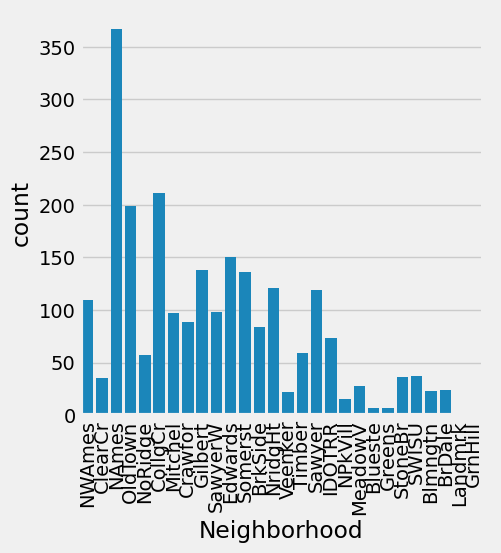

In [42]:
sns.catplot(data_train, x="Neighborhood", kind="count")
plt.xticks(rotation=90)
plt.show()

Let's do the same for *HouseStyle*.

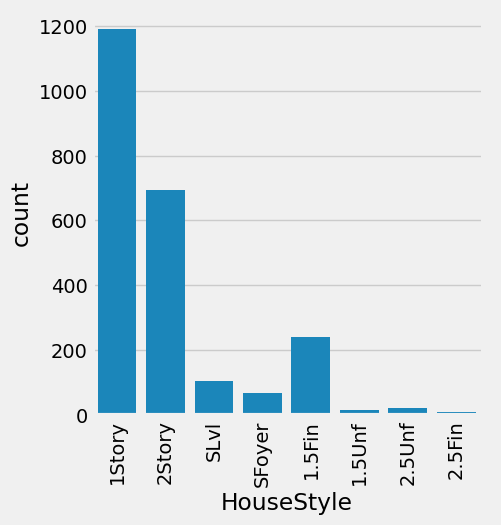

In [16]:
# YOUR CODE HERE
sns.catplot(data_train, x="HouseStyle", kind="count")
plt.xticks(rotation=90)
plt.show()

### Visualize the relationship between the dependent variable (i.e., SalePrice) and numerical independent variables.

In the following, we will use scatter plots with linear trend lines to visually explore the relationship between *SalePrice* (Y axis) and various numerical independent variable (X axis). See https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot for more information.

*SalePrice* and *LotArea*.

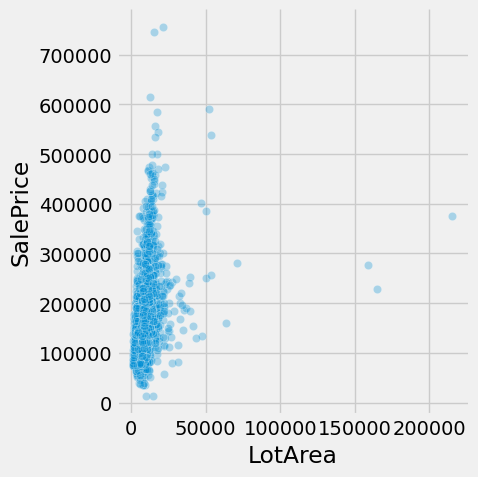

In [46]:
sns.relplot(data=data_train, x="LotArea", y="SalePrice", alpha=0.3)
plt.show()

The function *regplot()* is an alternative to *relplot()* that includes a linear regression model fit that can be drawn on the plot. See https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot for more information.

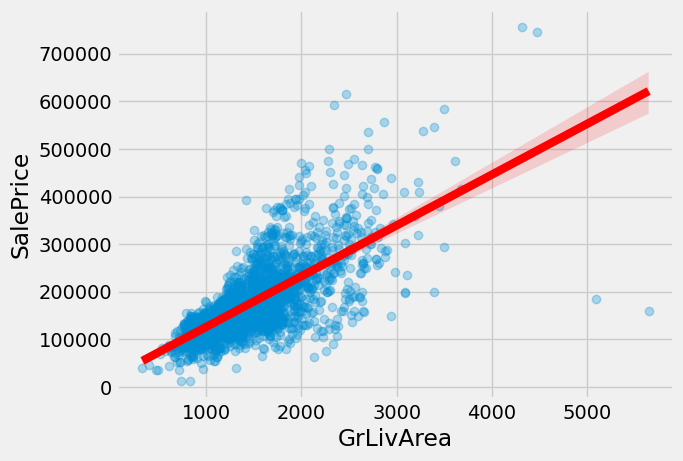

In [18]:
sns.regplot(data=data_train, x="GrLivArea", y="SalePrice", scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.show()

### Visualize the relationship between the dependent variable (i.e., SalePrice) and categorical independent variables.

In the following, we will use multiple box plots to visually explore the relationship between *SalePrice* (Y axis) and various categorical independent variable (X axis).


*SalePrice* and *OverallQual*.

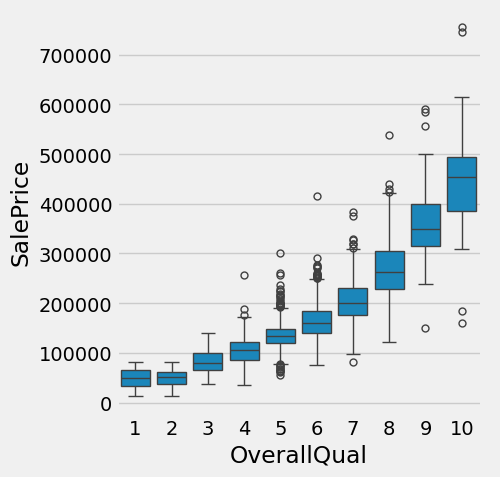

In [19]:
sns.catplot(data=data_train, x="OverallQual", y="SalePrice", kind="box")
plt.show()

*SalePrice* and *OverallCond*.

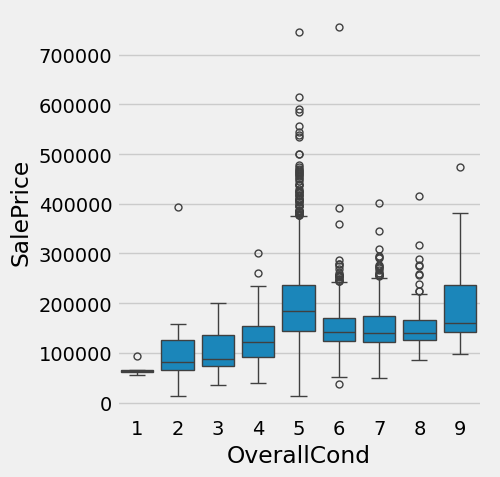

In [47]:
# YOUR CODE HERE
sns.catplot(data=data_train, x="OverallCond", y="SalePrice", kind="box")
plt.show()

Violin plots are similar to box plots, except that they also show the probability density of the data at different values.

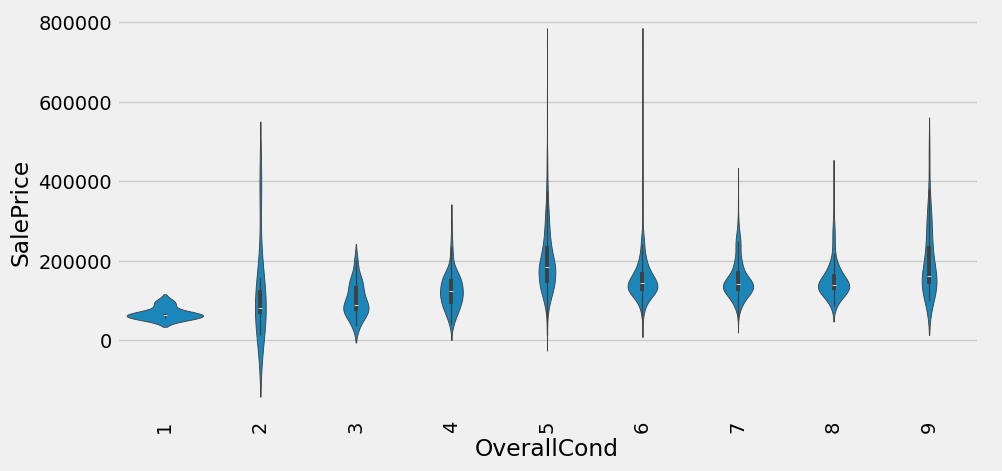

In [21]:
sns.catplot(data=data_train, x="OverallCond", y="SalePrice", kind="violin", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## Train linear models

After getting a feeling for the data, we are now ready to fit some linear regression models. We will use the *statsmodels* package, esp. the the formula API to be able to specify R-style formulas. See https://www.statsmodels.org/dev/example_formulas.html for more information.

#### Simple linear regression models

Let's start with a simple model that includes only one independent variable, e.g., *GrLivArea*.

In [22]:
mod_01 = smf.ols(formula='SalePrice ~ GrLivArea', data=data_train)
mod_01 = mod_01.fit()
print(mod_01.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     2229.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:25:28   Log-Likelihood:                -28919.
No. Observations:                2344   AIC:                         5.784e+04
Df Residuals:                    2342   BIC:                         5.785e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.925e+04   3562.265      5.404      0.0

Create a simple linear regression model with *BedroomAbvGr* as the only independent variable.

In [23]:
# YOUR CODE HERE
mod_02= smf.ols(formula='SalePrice ~ BedroomAbvGr', data=data_train)
mod_02 = mod_02.fit()
print(mod_02.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     53.37
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           3.77e-13
Time:                        15:25:28   Log-Likelihood:                -29677.
No. Observations:                2344   AIC:                         5.936e+04
Df Residuals:                    2342   BIC:                         5.937e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.387e+05   5687.832     24.377   

#### Multiple linear regression models

Let's create a multiple linear regression model with both *GrLivArea* and *BedroomAbvGr* as independent variables.

In [24]:
mod_03 = smf.ols(formula='SalePrice ~ GrLivArea + BedroomAbvGr', data=data_train)
mod_03 = mod_03.fit()
print(mod_03.summary2())
# the coefficient of bedroomAbvGr is negative: the model assumes the variables are independent, but they are not, we can't add more rooms
# if you dont adjust living space area

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.552     
Dependent Variable:    SalePrice          AIC:                  57526.6149
Date:                  2024-11-09 15:25   BIC:                  57543.8937
No. Observations:      2344               Log-Likelihood:       -28760.   
Df Model:              2                  F-statistic:          1446.     
Df Residuals:          2341               Prob (F-statistic):   0.00      
R-squared:             0.553              Scale:                2.6635e+09
--------------------------------------------------------------------------
                Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------
Intercept     63497.5648 4104.3599  15.4708 0.0000  55449.0059  71546.1238
GrLivArea       130.7258    2.4816  52.6772 0.0000    125.8594    135.5923
BedroomAbvGr -28143.0020 1526.5209 -18.4360 0.0

#### Categorical independent variables

Fit a linear regression model with a categorical independent variable (*HouseStyle*).

In [25]:
mod_04 = smf.ols(formula='SalePrice ~ GrLivArea + BedroomAbvGr + HouseStyle', data=data_train)
mod_04 = mod_04.fit()
print(mod_04.summary2())
# the linear regression has an hidden reference. The 1.5Fin in this case is compared with the other levels of House style.
# The 1.5Unf costs 40k more than 1.5Fin.

                          Results: Ordinary least squares
Model:                     OLS                   Adj. R-squared:          0.614     
Dependent Variable:        SalePrice             AIC:                     57186.6945
Date:                      2024-11-09 15:25      BIC:                     57244.2907
No. Observations:          2344                  Log-Likelihood:          -28583.   
Df Model:                  9                     F-statistic:             414.8     
Df Residuals:              2334                  Prob (F-statistic):      0.00      
R-squared:                 0.615                 Scale:                   2.2971e+09
------------------------------------------------------------------------------------
                        Coef.     Std.Err.     t     P>|t|     [0.025       0.975]  
------------------------------------------------------------------------------------
Intercept            -12994.3949  5585.7819  -2.3263 0.0201  -23948.0065  -2040.7834
HouseSt

In [26]:
data_train["HouseStyle"].value_counts()

,count
HouseStyle,
1Story,1191
2Story,694
1.5Fin,242
SLvl,104
SFoyer,68
2.5Unf,21
1.5Unf,16
2.5Fin,8


#### Interaction effects

Fit a linear regression model with an interaction term between two numerical independent variables.


In [27]:
mod_05 = smf.ols(formula='SalePrice ~ GrLivArea * LotArea', data=data_train)
mod_05 = mod_05.fit()
print(mod_05.summary2())

                       Results: Ordinary least squares
Model:                  OLS                 Adj. R-squared:        0.507     
Dependent Variable:     SalePrice           AIC:                   57755.0484
Date:                   2024-11-09 15:25    BIC:                   57778.0869
No. Observations:       2344                Log-Likelihood:        -28874.   
Df Model:               3                   F-statistic:           802.9     
Df Residuals:           2340                Prob (F-statistic):    0.00      
R-squared:              0.507               Scale:                 2.9349e+09
-----------------------------------------------------------------------------
                     Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------------
Intercept         -18980.6693 5639.7595 -3.3655 0.0008 -30040.1154 -7921.2233
GrLivArea            123.4993    3.3914 36.4153 0.0000    116.8488   130.1498
LotArea  

Fit a linear regression model with an interaction term between a categorical and numerical independent variable. In the formula API, the *C()* function can be used to indicate that a numerical variable should be treated as categorical.

In [28]:
mod_05 = smf.ols(formula='SalePrice ~ GrLivArea * C(OverallQual)', data=data_train)
mod_05 = mod_05.fit()
print(mod_05.summary2())

                              Results: Ordinary least squares
Model:                       OLS                      Adj. R-squared:             0.789     
Dependent Variable:          SalePrice                AIC:                        55784.0188
Date:                        2024-11-09 15:25         BIC:                        55899.2110
No. Observations:            2344                     Log-Likelihood:             -27872.   
Df Model:                    19                       F-statistic:                461.1     
Df Residuals:                2324                     Prob (F-statistic):         0.00      
R-squared:                   0.790                    Scale:                      1.2573e+09
--------------------------------------------------------------------------------------------
                                  Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------------------------
Intercep

#### Log-transformation of the DV

Fit a linear regression model with a logarithmic transformation of the dependent variable. With *np.log()* we can specify the transformation on the fly.


In [29]:
mod_07a = smf.ols(formula='np.log(SalePrice) ~ BedroomAbvGr', data=data_train)
mod_07a = mod_07a.fit()
print(mod_07a.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     80.15
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           6.89e-19
Time:                        15:25:29   Log-Likelihood:                -1145.4
No. Observations:                2344   AIC:                             2295.
Df Residuals:                    2342   BIC:                             2306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.7587      0.029    399.610   

For comparison, the same model without the log-transformation.

In [30]:
mod_07b = smf.ols(formula='SalePrice ~ BedroomAbvGr', data=data_train)
mod_07b = mod_07b.fit()
print(mod_07b.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     53.37
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           3.77e-13
Time:                        15:25:29   Log-Likelihood:                -29677.
No. Observations:                2344   AIC:                         5.936e+04
Df Residuals:                    2342   BIC:                         5.937e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.387e+05   5687.832     24.377   

#### Polynomial transformation of the IVs

Fit a linear regression model with a second-order polynomial term (*GrLivArea*)

In [31]:
mod_08 = smf.ols(formula='SalePrice ~ GrLivArea + GrLivArea^2', data=data_train)
mod_08 = mod_08.fit()
print(mod_08.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:25:29   Log-Likelihood:                -28919.
No. Observations:                2344   AIC:                         5.784e+04
Df Residuals:                    2341   BIC:                         5.786e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.973e+04   3608.414      5.468

### Make predicitons

Use a trained model to make predictions for the test set.

In [32]:
preds = mod_03.predict(data_test)
preds

,0
1357,196857.802707
2367,113716.170606
2822,204439.901232
2126,108487.137141
1544,127348.604725
...,...
2268,128880.367656
456,332980.345754
462,190881.361330
2168,129570.943947


Calculate the test set RMSE.

In [50]:
rmse = root_mean_squared_error(data_test["SalePrice"], preds)
print(rmse)
#homework get an rmse<30k

#log -> Correct
preds07 = mod_07a.predict(data_test)
rmse = root_mean_squared_error(data_test["SalePrice"], preds07)
print(rmse)

#polynomial
preds08 = mod_08.predict(data_test)
rmse = root_mean_squared_error(data_test["SalePrice"], preds08)
print(rmse)

#categorical C()
preds05 = mod_05.predict(data_test)
rmse = root_mean_squared_error(data_test["SalePrice"], preds05)
print(rmse)

# categorical independent variable (HouseStyle).
preds04 = mod_04.predict(data_test)
rmse = root_mean_squared_error(data_test["SalePrice"], preds04)
print(rmse)

#indipendet single
preds02 = mod_02.predict(data_test)
rmse = root_mean_squared_error(data_test["SalePrice"], preds02)
print(rmse)


56878.89635621068
209715.68503496776
61764.89412775922
37169.80965816642
51896.2290946334
89479.91666640838
